In [1]:
import numpy as np
import matplotlib.pyplot as plt

function\
$$ 
f(x) = x^3 - 7x^2 + 14x - 5 = 0 \\
f'(x) = 3x^2 - 14x + 14 = 0
$$

In [2]:
# function
def func1(x):
    y = x**3 - 7*x**2 + 14*x - 5
    return y

def func_der(x):
    y = 3*x**2 - 14*x + 14
    return y

x1 = np.arange(-1, 4, 0.1)
y1 = func1(x1)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

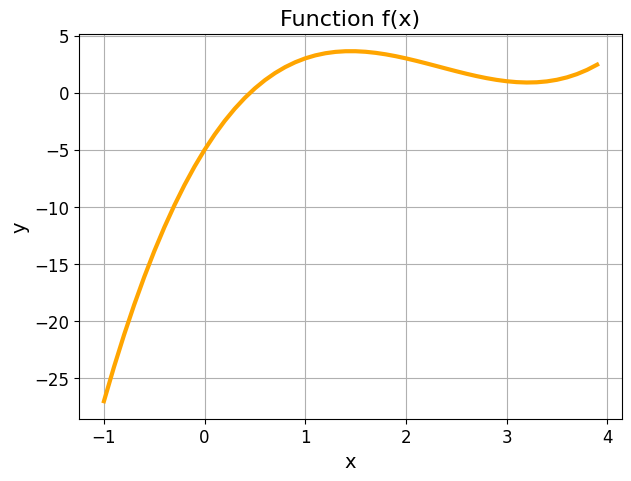

In [3]:
# plot the function, checking
plt.figure(figsize=(7, 5))
plt.plot(x1, y1, label='function 1', color='orange', lw=3)
#plt.xlim(-1, 5)   # Set x-axis from 2 to 8
#plt.ylim(-50, 50) # Set y-axis from -0.5 to 0.5
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Function f(x)', size=16)
plt.grid(True)
plt.tight_layout
#plt.savefig('HW02_function1.png', dpi=250, transparent=True)

In [4]:
# Bisection method
# Initial guess
xL = -4
xU = 1
err_tol = 1e-8
#err_B = 0.5 * (xL + xU) # arbitrary choice

def bisection(func1, xL, xU, err_tol):
    err_B = float('inf')   # dummy
    #err_B = 0.5 * (xL + xU)
    xr_old_B = 0
    iter_B = 0

    while err_B > err_tol:
        iter_B += 1
        
        xr_B = 0.5 * (xL + xU)
        
        fL = func1(xL)
        fr = func1(xr_B)
        
        if fL * fr < 0:
            xU = xr_B
        else:
            xL = xr_B
        
        err_B = abs((xr_B - xr_old_B)/xr_B)
        xr_old_B = xr_B

        #print("error", err_B)

    return xr_B, iter_B, err_B

root_B, iterations_B, err_B = bisection(func1, xL, xU, err_tol)

print(f"Bisection method with initial xL = {xL}, xU = {xU}")
print("Root:", root_B)
print("Iterations:", iterations_B)
print("Error relative:", err_B)


Bisection method with initial xL = -4, xU = 1
Root: 0.4531817245297134
Iterations: 31
Error relative: 5.1376882837781736e-09


In [97]:
# Newton-Raphson method
# Initial guess

x0 = 0
#x0_list = np.array([-2, -1, 0, 1, 2]) #various guess
x0_list = np.arange(-2,7,0.25) #various guess

err_tol = 1e-8

def nr(func1, func_der, x0, err_tol): 
    
    iter_NR = 0
    err_NR = float('inf') 

    while err_NR > err_tol:
        iter_NR += 1

        f = func1(x0)
        df = func_der(x0) 

        # Avoid division by zero
        if df == 0:
            print("Derivative is zero. Stopping iteration.")
            return None, iter_NR, None
        
        # Newton-Raphson update
        x1 = x0 - f / df
        
        err_NR = abs((x1 - x0)/x1)
        if x1 != 0:
            err_NR = abs((x1 - x0)/x1)
        else:
            err_NR = abs(x1 - x0)
        
        x0 = x1
        
        #print("error =", err_NR)
    return x0, iter_NR, err_NR

root_NR, iterations_NR, err_NR = nr(func1, func_der, x0, err_tol)

print(f"Newton-Raphson method with x0 = {x0}")
print("Root:", root_NR)
print("Iterations:", iterations_NR)
print("Error relative:", err_NR)

Newton-Raphson method with x0 = 0
Root: 0.453181723115918
Iterations: 5
Error relative: 7.474561934586011e-10


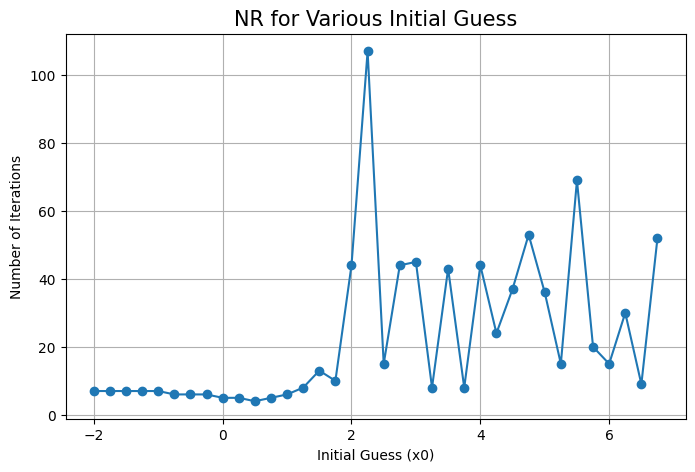

In [31]:
iterations_list = []

for x0 in x0_list:
    root, iterations, err_NR = nr(func1, func_der, x0, err_tol)
    #print(f"x0: {x0}, Root: {root}, Iterations: {iterations}")
    iterations_list.append(iterations)


plt.figure(figsize=(8,5))
plt.plot(x0_list, iterations_list, marker='o', linestyle='-')
#plt.plot(x1, y1, label='function 1', color='orange', lw=3)
plt.xlabel("Initial Guess (x0)")
plt.ylabel("Number of Iterations")
plt.title("NR for Various Initial Guess", fontsize=15)
plt.grid(True)
plt.show()

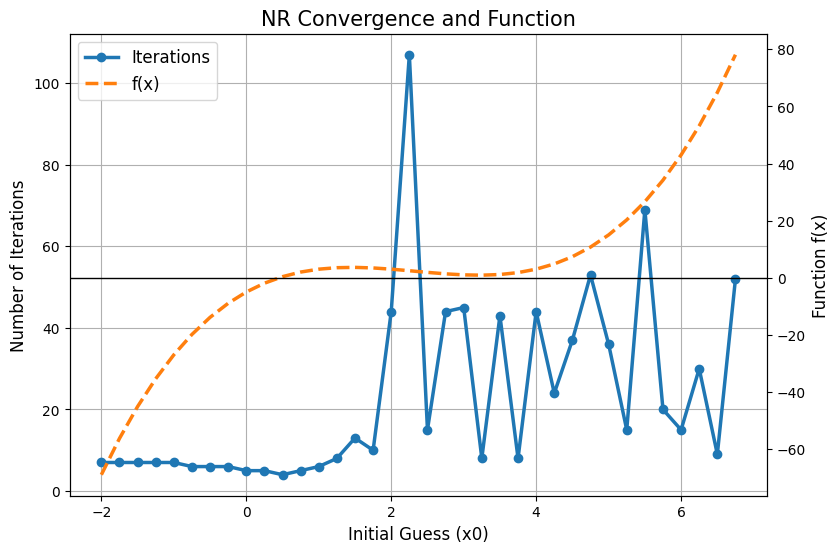

In [32]:
fig, ax1 = plt.subplots(figsize=(9,6))

# Left axis → iterations
ax1.plot(x0_list, iterations_list, color='tab:blue', marker='o', lw=2.5, label='Iterations')
ax1.set_xlabel("Initial Guess (x0)", fontsize=12)
ax1.set_ylabel("Number of Iterations", fontsize=12)
ax1.tick_params(axis='y')
ax1.grid(True)


# Right axis → function
ax2 = ax1.twinx()
ax2.plot(x0_list, func1(x0_list), color='tab:orange', lw=2.5, linestyle='--', label='f(x)')
ax2.set_ylabel("Function f(x)", fontsize=12)
ax2.tick_params(axis='y') #, labelcolor='red'
ax2.axhline(0, color='black', linewidth=1)

plt.title("NR Convergence and Function", fontsize=15)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

#plt.savefig('HW02_prob2NR.png', dpi=250, transparent=True)
plt.show()

function for problem 3
$$
f(x) = 9.34 - 21.97x + 16.3x^3 - 3.704x^5 = 0 \\
f'(x) = - 21.97 + 48.9x^2 - 18.52x^4 = 0
$$

In [10]:
# function for problem 3
def func2(x):
    y = 9.34 - 21.97*x + 16.3*x**3 - 3.704*x**5
    return y

def func2_der(x):
    y = - 21.97 + 48.9*x**2 - 18.52*x**4
    return y

x2 = np.arange(0, 2, 0.1)
y2 = func2(x2)
y2der = func2_der(x2)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

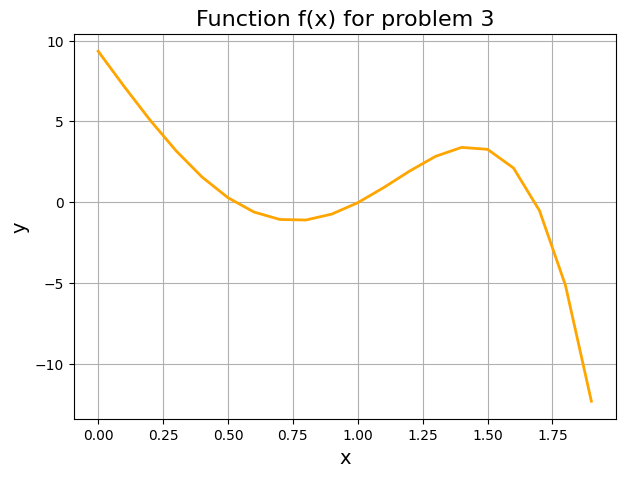

In [11]:
# plot the function, checking
plt.figure(figsize=(7, 5))
plt.plot(x2, y2, label='function 1', color='orange', lw=2)
#plt.xlim(-1, 5)   # Set x-axis from 2 to 8
#plt.ylim(-50, 50) # Set y-axis from -0.5 to 0.5
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Function f(x) for problem 3', size=16)
plt.grid(True)

plt.tight_layout

#plt.savefig('HW02_prob3_function1.png', dpi=250, transparent=True)

In [66]:
# Newton-Raphson method
# Initial guess
x0_prob3 = np.array([0.25, 1, 1.75]) #various guess

err_tol = 1e-8

iterations_list = []

for x0 in x0_prob3:
    root, iterations, err_NR = nr(func2, func2_der, x0, err_tol)
    print(f"x0: {x0}, Root: {root}, Iterations: {iterations}, error: {err_NR}")
    iterations_list.append(iterations)

x0: 0.25, Root: 0.5266910451247159, Iterations: 6, error: 2.220446049250313e-16
x0: 1.0, Root: 1.0040201751888553, Iterations: 3, error: 6.989779866017898e-10
x0: 1.75, Root: 1.6846730624333255, Iterations: 5, error: 1.4788170688007085e-13


$$
v = u \ln{\frac{m_0}{m_0 - qt}} - gt \\
f(t) = v - u \ln{\frac{m_0}{m_0 - qt}} + gt \\
f'(t) = g - \frac{uq}{m_0 - qt}
$$

In [88]:
# function for problem 3 2nd version
# rocket equation
u = 2200    # velocity of fuel ejection relative to rocket in m/s
v = 1000    # velocity of rocket in m/s
m0 = 160000  # mass of rocket in kg
q = 2680    # rate of fuel ejection in kg/s
g = 9.8     # gravity in m/s2

def vel(t):
    v = u*np.log(m0/(m0 - q*t)) - g*t
    return v

#def func3(t):
#    y = v - u*np.log(m0/(m0 - q*t)) + g*t
#    return y

def func3(t):
    mass = m0 - q*t
    return np.where(mass <= 0, np.inf, v - u*np.log(m0/mass) + g*t)

#def func3_der(t):
#    y = g - (u*q)/(m0 - q*t)
#    return y

def func3_der(t):
    mass = m0 - q*t
    return np.where(mass <= 0, np.inf, g - (u*q)/mass)

t = np.arange(0, 30, 0.1)
y3 = func3(t)
vel = vel(t)
y3der = func3_der(t)

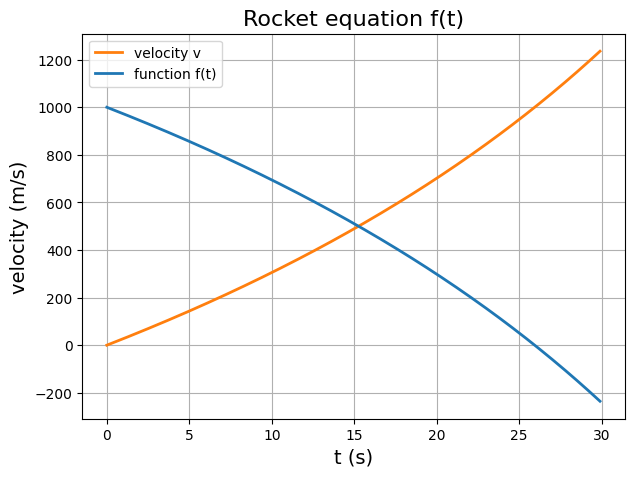

In [99]:
plt.figure(figsize=(7, 5))
plt.plot(t, vel, label='velocity v', color='tab:orange', lw=2)
plt.plot(t, y3, label='function f(t)', color='tab:blue', lw=2)
plt.xlabel('t (s)', size=14)
plt.ylabel('velocity (m/s)', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Rocket equation f(t)', size=16)
plt.grid(True)
plt.tight_layout
plt.legend()

plt.savefig('HW02_prob3_function2.png', dpi=250, transparent=True)

In [98]:
# Newton-Raphson method
# Initial guess
x0_list_rocket = np.arange(24,27,0.5) #various guess

err_tol = 1e-8

x0_rocket = 2

iterations_list = []

for x0 in x0_list_rocket:
    root_rocket, iterations_rocket, err_NR_rocket = nr(func3, func3_der, x0, err_tol)
    print(f"x0: {x0}, Root: {root_rocket}, Iterations: {iterations_rocket}, Error: {err_NR_rocket}")
    iterations_list.append(iterations_rocket)

#root_NR_rocket, iterations_NR_rocket, err_NR_rocket = nr(func3, func3_der, x0_rocket, err_tol)

#root_NR, iterations_NR, err_NR = nr(func1, func_der, x0, err_tol)

#print(f"Newton-Raphson method with x0 = {x0_rocket}")
#print("Root:", root_rocket)
#print("Iterations:", iterations_rocket)
#print("Error relative:", err_NR_rocket)

x0: 24.0, Root: 25.942392982185904, Iterations: 4, Error: 3.694673132358143e-12
x0: 24.5, Root: 25.942392982185908, Iterations: 4, Error: 3.445567886509169e-13
x0: 25.0, Root: 25.942392982185904, Iterations: 4, Error: 1.1914324567817876e-14
x0: 25.5, Root: 25.942392982185908, Iterations: 3, Error: 7.789948036134218e-09
x0: 26.0, Root: 25.942392982185915, Iterations: 3, Error: 2.2498900956859747e-12
x0: 26.5, Root: 25.942392982185908, Iterations: 4, Error: 2.738925188004109e-16
